<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Recommender Systems

_Authors: David Yerrington(SF) _

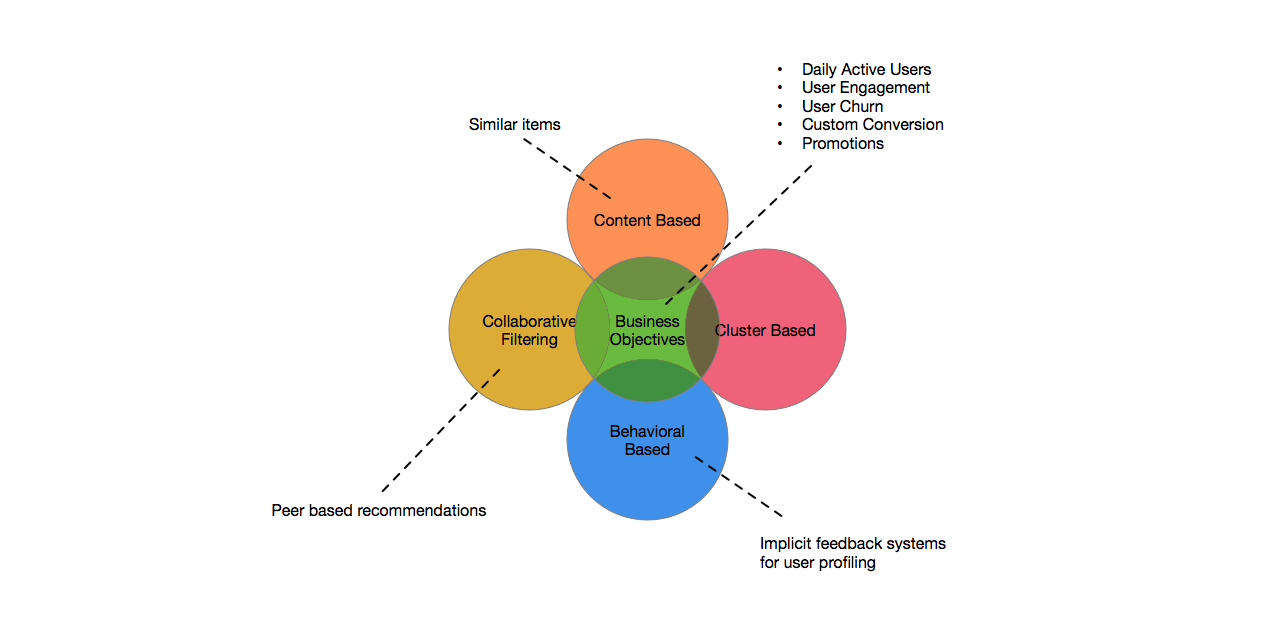

---

<a id="learning-objectives"></a>
### Learning Objectives
*After this lesson, you will be able to:*
- Explain common recommendation techniques
    - Collaborative based
    - Content based
- Types of data used for recommenation, and their tradeoffs
    - Explicit
    - Implicit
- Implement a basic recommender



# <img src="https://snag.gy/tGMEZo.jpg" style="float: left; width: 25px; margin-right: 5px;"> What exactly is a recommender system?

* How do they work and what do they seek to accomplish?  
* What kind of data do we need to bake a recommender?

### First, let's talk about data.

In order to make recommendations, there's a bit of expostion that's helpful to understand about data. The kind of recommendations you can give, are dependent on the data you have. 

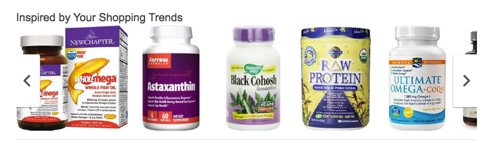

## We need data to recommend!

* Preferences
* Ratings
* Item meta-data
* User Behavior


## Common Recommender User-Item Collaborative Filtering


In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt, seaborn as sns
import pandas as pd, numpy as np
from IPython.display import display

%matplotlib inline

In [2]:
users = [
    ("Chuck", 1, 1, 0, 0, 0, 0),
    ("Nancy", 1, 0, 0, 0, 1, 0),
    ("Divya", 0, 0, 0, 1, 1, 1),
    ("Pat", 0, 0, 1, 0, 1, 1),
]

users = pd.DataFrame(users, columns=["user", "Friday the 13th", "Nightmare on Elm St", "Dawn of the Dead", "Hiro Dreams of Sushi", "180 South", "Exit Through the Giftshop"])
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


### User Similarity

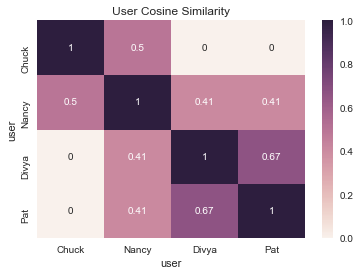

In [3]:
sim_matrix = cosine_similarity(users, users)
users_sim = pd.DataFrame(sim_matrix, columns=users.index, index=users.index)
sns.heatmap(users_sim, annot=True)
plt.title("User Cosine Similarity")

### We could make friend recommendations at this point
If we wanted to base our friend suggestions on movie preferences, we could do this.

In [4]:
users_sim

user,Chuck,Nancy,Divya,Pat
user,,,,
Chuck,1.0,0.500000,0.000000,0.000000
Nancy,0.5,1.000000,0.408248,0.408248
Divya,0.0,0.408248,1.000000,0.666667
Pat,0.0,0.408248,0.666667,1.000000


In [5]:
User = "Chuck"
top_n_users = lambda user: users_sim.loc[user,:].T.sort_values()[::-1]
display("Top Similar User to " + User, top_n_users(User))


'Top Similar User to Chuck'

user
Chuck    1.0
Nancy    0.5
Pat      0.0
Divya    0.0
Name: Chuck, dtype: float64

In [6]:
# Movies that the most similar user has seen. Which movie would you recommend to Chuck?
users.loc[[User,top_n_users(User).index[1]],:]

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
